<a href="https://colab.research.google.com/github/minhhung250302/TrinhMinhHungUTE/blob/main/mon_an.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Trịnh Minh Hưng

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN/food

/content/drive/MyDrive/Colab Notebooks/BTVN/food


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/food/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 59 images belonging to 10 classes.


In [ ]:
training_set.class_indices

{'banh mi': 0,
 'banh trung': 1,
 'banh trung thu': 2,
 'banh xeo': 3,
 'bun dau': 4,
 'che': 5,
 'com tam': 6,
 'ga luoc': 7,
 'pho': 8,
 'xoi': 9}

In [ ]:
validation_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/food/Val',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 55 images belonging to 10 classes.


In [ ]:
validation_set.class_indices

{'banh mi': 0,
 'banh trung': 1,
 'banh trung thu': 2,
 'banh xeo': 3,
 'bun dau': 4,
 'che': 5,
 'com tam': 6,
 'ga luoc': 7,
 'pho': 8,
 'xoi': 9}

In [ ]:

model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=30 ,batch_size=128,verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=11)])

Epoch 1/30
2/2 [==============================] - ETA: 0s - loss: 1.8682 - accuracy: 0.7966

2/2 [==============================] - 2s 496ms/step - loss: 1.8682 - accuracy: 0.7966
Epoch 2/30
2/2 [==============================] - ETA: 0s - loss: 0.9468 - accuracy: 0.8475    

2/2 [==============================] - 1s 464ms/step - loss: 0.9468 - accuracy: 0.8475
Epoch 3/30
2/2 [==============================] - ETA: 0s - loss: 0.5837 - accuracy: 0.8475

2/2 [==============================] - 1s 688ms/step - loss: 0.5837 - accuracy: 0.8475
Epoch 4/30
2/2 [==============================] - ETA: 0s - loss: 0.2692 - accuracy: 0.9322

2/2 [==============================] - 1s 590ms/step - loss: 0.2692 - accuracy: 0.9322
Epoch 5/30
2/2 [==============================] - ETA: 0s - loss: 0.2535 - accuracy: 0.9492

2/2 [==============================] - 1s 584ms/step - loss: 0.2535 - accuracy: 0.9492
Epoch 6/30
2/2 [==============================] - ETA: 0s - loss: 0.2843 - accuracy: 0.9322

2/2 [==============================] - 1s 465ms/step - loss: 0.2843 - accuracy: 0.9322
Epoch 7/30
2/2 [==============================] - ETA: 0s - loss: 0.3753 - accuracy: 0.8814

2/2 [==============================] - 1s 604ms/step - loss: 0.3753 - accuracy: 0.8814
Epoch 8/30
2/2 [==============================] - ETA: 0s - loss: 0.3448 - accuracy: 0.9153

2/2 [==============================] - 1s 559ms/step - loss: 0.3448 - accuracy: 0.9153
Epoch 9/30
2/2 [==============================] - ETA: 0s - loss: 0.2477 - accuracy: 0.8814

2/2 [==============================] - 1s 537ms/step - loss: 0.2477 - accuracy: 0.8814
Epoch 10/30
2/2 [==============================] - ETA: 0s - loss: 0.1753 - accuracy: 0.9661

2/2 [==============================] - 1s 610ms/step - loss: 0.1753 - accuracy: 0.9661
Epoch 11/30
2/2 [==============================] - ETA: 0s - loss: 0.2730 - accuracy: 0.9492

2/2 [==============================] - 1s 641ms/step - loss: 0.2730 - accuracy: 0.9492
Epoch 12/30
2/2 [==============================] - ETA: 0s - loss: 0.1256 - accuracy: 0.9492

2/2 [==============================] - 1s 569ms/step - loss: 0.1256 - accuracy: 0.9492
Epoch 13/30
2/2 [==============================] - ETA: 0s - loss: 0.1362 - accuracy: 0.9661

2/2 [==============================] - 1s 548ms/step - loss: 0.1362 - accuracy: 0.9661
Epoch 14/30
2/2 [==============================] - ETA: 0s - loss: 0.0405 - accuracy: 1.0000

2/2 [==============================] - 1s 526ms/step - loss: 0.0405 - accuracy: 1.0000
Epoch 15/30
2/2 [==============================] - ETA: 0s - loss: 0.0289 - accuracy: 1.0000

2/2 [==============================] - 1s 519ms/step - loss: 0.0289 - accuracy: 1.0000
Epoch 16/30
2/2 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9831

2/2 [==============================] - 1s 561ms/step - loss: 0.0419 - accuracy: 0.9831
Epoch 17/30
2/2 [==============================] - ETA: 0s - loss: 0.0261 - accuracy: 1.0000

2/2 [==============================] - 1s 572ms/step - loss: 0.0261 - accuracy: 1.0000
Epoch 18/30
2/2 [==============================] - ETA: 0s - loss: 0.0190 - accuracy: 1.0000

2/2 [==============================] - 1s 489ms/step - loss: 0.0190 - accuracy: 1.0000
Epoch 19/30
2/2 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 1.0000

2/2 [==============================] - 1s 618ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 20/30
2/2 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 1.0000

2/2 [==============================] - 1s 635ms/step - loss: 0.0086 - accuracy: 1.0000
Epoch 21/30
2/2 [==============================] - ETA: 0s - loss: 0.0592 - accuracy: 0.9831

2/2 [==============================] - 1s 572ms/step - loss: 0.0592 - accuracy: 0.9831
Epoch 22/30
2/2 [==============================] - ETA: 0s - loss: 0.0901 - accuracy: 0.9831

2/2 [==============================] - 1s 703ms/step - loss: 0.0901 - accuracy: 0.9831
Epoch 23/30
2/2 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 1.0000

2/2 [==============================] - 1s 660ms/step - loss: 0.0147 - accuracy: 1.0000
Epoch 24/30
2/2 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 0.9831

2/2 [==============================] - 1s 824ms/step - loss: 0.0150 - accuracy: 0.9831
Epoch 25/30
2/2 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000

2/2 [==============================] - 2s 826ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 26/30
2/2 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000

2/2 [==============================] - 1s 616ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 27/30
2/2 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 0.9831

2/2 [==============================] - 1s 644ms/step - loss: 0.0158 - accuracy: 0.9831
Epoch 28/30
2/2 [==============================] - ETA: 0s - loss: 0.0067 - accuracy: 1.0000

2/2 [==============================] - 1s 540ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 29/30
2/2 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 1.0000

2/2 [==============================] - 1s 487ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 30/30
2/2 [==============================] - ETA: 0s - loss: 0.0316 - accuracy: 0.9831

2/2 [==============================] - 1s 683ms/step - loss: 0.0316 - accuracy: 0.9831


In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Sai', Score[0])
print('Chính xác ', Score[1])

Train Sai 0.0806838795542717
Chính xác  0.9830508232116699


In [ ]:
model.save("Food.h5")

In [ ]:
model_CNN=load_model("Food.h5")

1/1 [==============================] - 0s 333ms/step
Bun dau


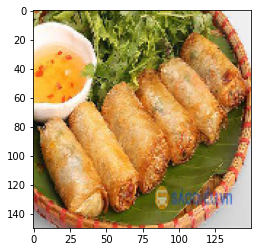

1/1 [==============================] - 0s 18ms/step
Pho


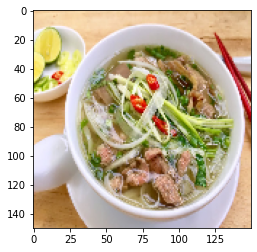

1/1 [==============================] - 0s 15ms/step
Pho


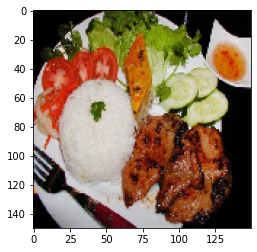

1/1 [==============================] - 0s 16ms/step
Xoi


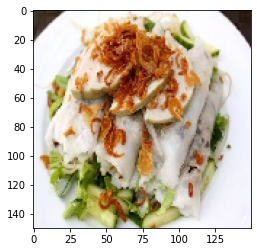

1/1 [==============================] - 0s 19ms/step
Bun dau


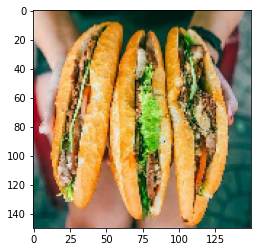

1/1 [==============================] - 0s 24ms/step
Bun dau


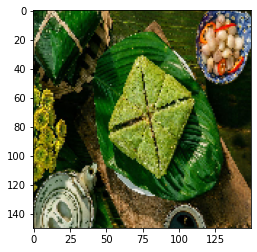

1/1 [==============================] - 0s 16ms/step
Bun dau


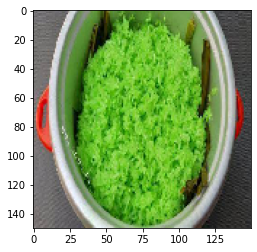

1/1 [==============================] - 0s 16ms/step
Ga luoc


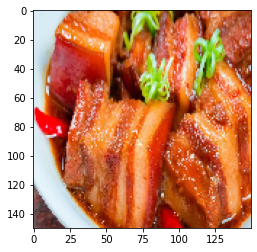

1/1 [==============================] - 0s 16ms/step
Ga luoc


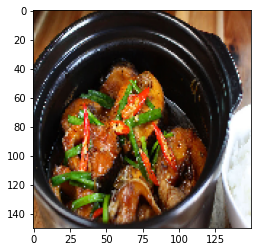

1/1 [==============================] - 0s 17ms/step
Pho


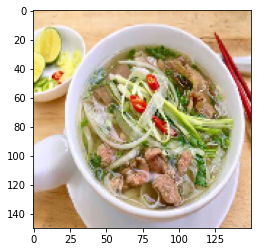

1/1 [==============================] - 0s 18ms/step
Ga luoc


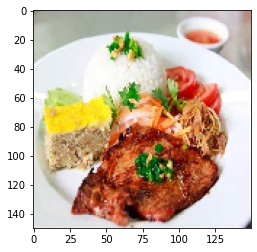

1/1 [==============================] - 0s 15ms/step
Com tam


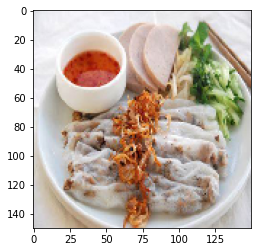

1/1 [==============================] - 0s 16ms/step
Pho


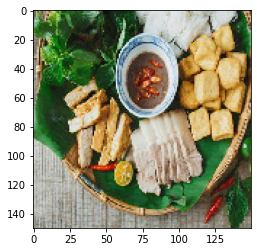

1/1 [==============================] - 0s 16ms/step
Banh trung


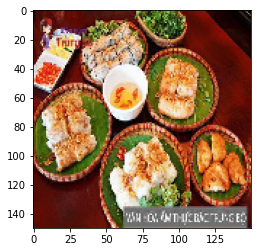

1/1 [==============================] - 0s 18ms/step
Xoi


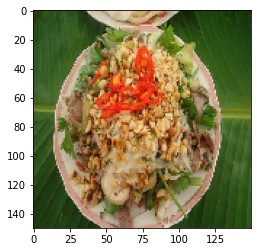

1/1 [==============================] - 0s 22ms/step
Banh trung


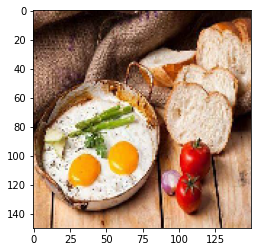

1/1 [==============================] - 0s 18ms/step
Bun dau


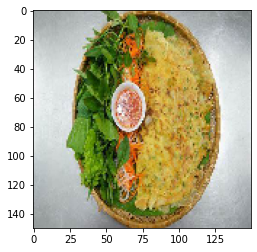

1/1 [==============================] - 0s 18ms/step
Bun dau


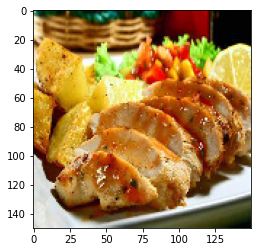

1/1 [==============================] - 0s 16ms/step
Bun dau


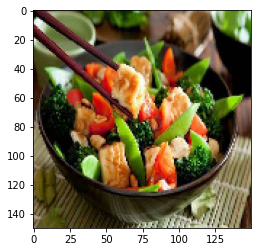

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/BTVN/food/Test"
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Banh mi'
  if round(result[0][1])==1:
    prediction='Banh trung'
  if round(result[0][2])==1:
    prediction='Banh trung thu'
  if round(result[0][3])==1:
    prediction='Banh xeo'
  if round(result[0][4])==1:
    prediction='Bun dau'
  if round(result[0][5])==1:
    prediction='Che'
  if round(result[0][6])==1:
    prediction='Com tam'
  if round(result[0][7])==1:
    prediction='Ga luoc'
  if round(result[0][8])==1:
    prediction='Pho'
  if round(result[0][9])==1:
    prediction='Xoi'
  print(prediction)
  plt.show()